# Analysis of SARS-Cov-2 intrasample variation

You can access your data via the dataset number. For example, ``handle = open(get(42), 'r')``.
To save data, write your data to a file, and then call ``put('filename.txt')``. The dataset will then be available in your galaxy history.
Notebooks can be saved to Galaxy by clicking the large green button at the top right of the IPython interface.<br>
More help and informations can be found on the project [website](https://github.com/bgruening/galaxy-ipython).

In [1]:
# Set display to the full length

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /Users/mvandenb/miniconda3/envs/sars_cov2/lib/python3.6/site-packages (20.0.2)


In [3]:
!pip install --upgrade seaborn biopython pandasql

Requirement already up-to-date: seaborn in /Users/mvandenb/miniconda3/envs/sars_cov2/lib/python3.6/site-packages (0.10.0)
Requirement already up-to-date: biopython in /Users/mvandenb/miniconda3/envs/sars_cov2/lib/python3.6/site-packages (1.76)
Requirement already up-to-date: pandasql in /Users/mvandenb/miniconda3/envs/sars_cov2/lib/python3.6/site-packages (0.7.3)


In [4]:
import pandas as pd
import seaborn as sns
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import matplotlib.pyplot as plt
%matplotlib inline

This notebook imports two datasets from Galaxy history:

 - a table of variants 
 - a GenBank file for NC_045512

In [5]:
# Import two datasets
# The number inside `get()` function corresponds to history ID

var_file = 17     # Number of history item with variant list
gb_file = 4      # Number of histoiry item containing genbank annoration for NC_045512

try:
    # In Galaxy
    var_path = get(var_file)
    gb_path = get(gb_file)
    IN_GALAXY = True
except NameError:
    # Local notebook execution
    var_path = 'variant_list.tsv'
    gb_path = 'NC_045512.2.genbank'
    IN_GALAXY = False

In [6]:
# Clean artifacts of SNPeff from file headers

!cat {var_path} | sed s/EFF\\\[\\\*\\\]\.//g > var.tab

In [7]:
# Create dataframes

var  = pd.read_csv('var.tab', sep='\t')

In [8]:
var.head()

,Sample,CHROM,POS,REF,ALT,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON
0,SRR10903401,NC_045512,1409,C,T,126,0.039683,1,"67,54,2,3",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,Cat/Tat
1,SRR10903401,NC_045512,1821,G,A,93,0.096774,0,"48,36,5,4",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,gGt/gAt
2,SRR10903401,NC_045512,1895,G,A,106,0.037736,0,"51,51,2,2",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,Gta/Ata
3,SRR10903401,NC_045512,2407,G,T,123,0.024390,0,"57,63,1,2",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,aaG/aaT
4,SRR10903401,NC_045512,3379,A,G,121,0.024793,0,"56,62,1,2",LOW,SILENT,SYNONYMOUS_CODING,orf1ab,gtA/gtG


In [9]:
# Add fiels describing variant type and set it to "I" (indels) for those rows that reference or alternative are gaps (-)
# or are of unequal length

var.loc[ ( var['REF'] == '-' ) | ( var['ALT'] == '-' ) ,'type'] = 'I'
var.loc[ ( var['ALT'].str.len() != var['REF'].str.len() ), 'type' ] = 'I'

In [10]:
var.head()

,Sample,CHROM,POS,REF,ALT,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,type
0,SRR10903401,NC_045512,1409,C,T,126,0.039683,1,"67,54,2,3",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,Cat/Tat,NaN
1,SRR10903401,NC_045512,1821,G,A,93,0.096774,0,"48,36,5,4",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,gGt/gAt,NaN
2,SRR10903401,NC_045512,1895,G,A,106,0.037736,0,"51,51,2,2",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,Gta/Ata,NaN
3,SRR10903401,NC_045512,2407,G,T,123,0.024390,0,"57,63,1,2",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,aaG/aaT,NaN
4,SRR10903401,NC_045512,3379,A,G,121,0.024793,0,"56,62,1,2",LOW,SILENT,SYNONYMOUS_CODING,orf1ab,gtA/gtG,NaN


In [11]:
# Set type field for SNPs
var.loc[ ( var['REF'].str.len() == 1 ) & ( var['ALT'].str.len() == 1 ) & (var['type'].isnull()), 'type'] = 'S'

In [12]:
var.head()

,Sample,CHROM,POS,REF,ALT,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,type
0,SRR10903401,NC_045512,1409,C,T,126,0.039683,1,"67,54,2,3",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,Cat/Tat,S
1,SRR10903401,NC_045512,1821,G,A,93,0.096774,0,"48,36,5,4",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,gGt/gAt,S
2,SRR10903401,NC_045512,1895,G,A,106,0.037736,0,"51,51,2,2",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,Gta/Ata,S
3,SRR10903401,NC_045512,2407,G,T,123,0.024390,0,"57,63,1,2",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,aaG/aaT,S
4,SRR10903401,NC_045512,3379,A,G,121,0.024793,0,"56,62,1,2",LOW,SILENT,SYNONYMOUS_CODING,orf1ab,gtA/gtG,S


In [13]:
# Set type field for MNPs 
var.loc[ ( ( var['REF'].str.len() > 1 ) & ( var['ALT'].str.len() == var['REF'].str.len() ) ) , 'type'  ] = 'M'

In [14]:
var.head()

,Sample,CHROM,POS,REF,ALT,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,type
0,SRR10903401,NC_045512,1409,C,T,126,0.039683,1,"67,54,2,3",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,Cat/Tat,S
1,SRR10903401,NC_045512,1821,G,A,93,0.096774,0,"48,36,5,4",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,gGt/gAt,S
2,SRR10903401,NC_045512,1895,G,A,106,0.037736,0,"51,51,2,2",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,Gta/Ata,S
3,SRR10903401,NC_045512,2407,G,T,123,0.024390,0,"57,63,1,2",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,aaG/aaT,S
4,SRR10903401,NC_045512,3379,A,G,121,0.024793,0,"56,62,1,2",LOW,SILENT,SYNONYMOUS_CODING,orf1ab,gtA/gtG,S


In [15]:
# Select counts by Sample and by type

pysqldf('select Sample, type, count(*) from var group by Sample, type')

,Sample,type,count(*)
0,SRR10903401,S,70
1,SRR10903402,S,215
2,SRR10971381,S,96
3,SRR11059940,S,3
4,SRR11059942,S,924
5,SRR11059943,S,130
6,SRR11059944,S,1055
7,SRR11059945,S,497
8,SRR11059946,S,10788
9,SRR11059947,S,20545


In [16]:
# Select counts by Sample and by type for SNPs wil allele frequency above 5%

pysqldf('select Sample, type, count(*) from var where AF >= 0.05 group by Sample, type')

,Sample,type,count(*)
0,SRR10903401,S,9
1,SRR10903402,S,6
2,SRR10971381,S,14
3,SRR11059940,S,3
4,SRR11059942,S,103
5,SRR11059943,S,34
6,SRR11059944,S,7
7,SRR11059945,S,30
8,SRR11059946,S,40
9,SRR11059947,S,7


In [17]:
pysqldf('select Sample, EFFECT, count(*) as N from var group by Sample, EFFECT').pivot(index='Sample',columns='EFFECT',values='N').fillna(0)

EFFECT,.,NON_SYNONYMOUS_CODING,NON_SYNONYMOUS_CODING+SPLICE_SITE_REGION,NON_SYNONYMOUS_START,SPLICE_SITE_REGION+SYNONYMOUS_CODING,SPLICE_SITE_REGION+SYNONYMOUS_STOP,START_LOST,STOP_GAINED,STOP_LOST,STOP_LOST+SPLICE_SITE_REGION,SYNONYMOUS_CODING,SYNONYMOUS_STOP
Sample,,,,,,,,,,,,
SRR10903401,0.0,43.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,23.0,0.0
SRR10903402,4.0,138.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,69.0,0.0
SRR10971381,3.0,46.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,43.0,0.0
SRR11059940,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
SRR11059942,10.0,570.0,0.0,0.0,0.0,1.0,1.0,11.0,0.0,1.0,330.0,0.0
SRR11059943,0.0,84.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,42.0,0.0
SRR11059944,11.0,660.0,1.0,0.0,0.0,1.0,1.0,17.0,0.0,1.0,363.0,0.0
SRR11059945,3.0,298.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,192.0,0.0
SRR11059946,108.0,6504.0,0.0,1.0,0.0,8.0,18.0,104.0,0.0,6.0,4039.0,0.0


In [18]:
pysqldf('select Sample, EFFECT, count(*) as N from var where AF >= 0.05 group by Sample, EFFECT').pivot(index='Sample',columns='EFFECT',values='N').fillna(0)

EFFECT,.,NON_SYNONYMOUS_CODING,START_LOST,STOP_GAINED,SYNONYMOUS_CODING
Sample,,,,,
SRR10903401,0.0,4.0,0.0,1.0,4.0
SRR10903402,1.0,4.0,0.0,0.0,1.0
SRR10971381,0.0,6.0,1.0,0.0,7.0
SRR11059940,0.0,2.0,0.0,0.0,1.0
SRR11059942,0.0,77.0,0.0,2.0,24.0
SRR11059943,0.0,24.0,0.0,1.0,9.0
SRR11059944,0.0,5.0,0.0,0.0,2.0
SRR11059945,0.0,22.0,0.0,0.0,8.0
SRR11059946,3.0,24.0,0.0,3.0,10.0


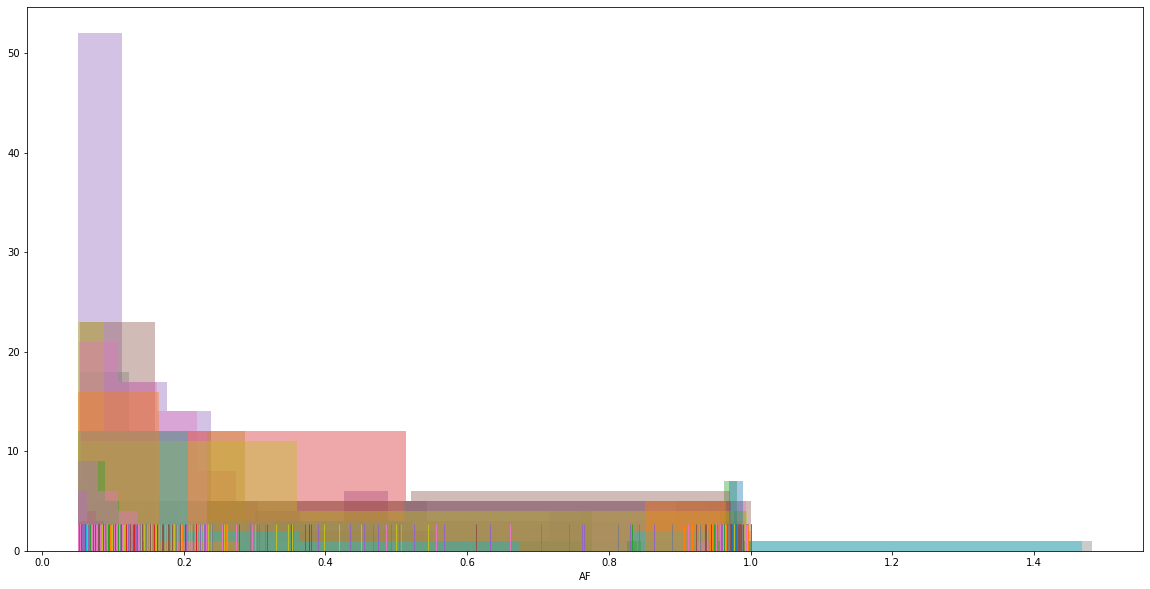

In [19]:
# Plot histogram of allele frequencies for three sample
# Restricted to variants with minor allele frequency above 5%

plt.figure(figsize=(20,10))
for sample in var['Sample'].unique():
    sns.distplot(var['AF'][(var['AF']>=0.05) & (var['Sample']==sample)],kde=False,rug=True)

In [20]:
# Define categorical columns

for col in ['IMPACT','FUNCLASS','EFFECT']:
    var[col] = var[col].astype('category')

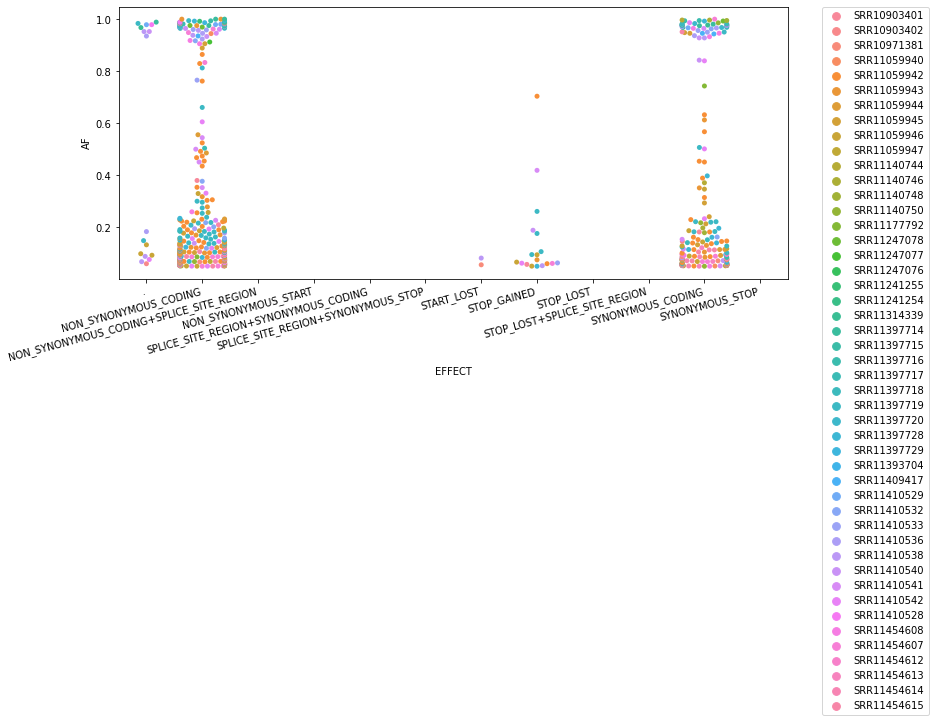

In [21]:
# Plot Allele frequencies by sample and functional category

plt.figure(figsize=(12,5))
g = sns.swarmplot(x='EFFECT',y='AF',data=var[var['AF']>=0.05], hue='Sample')
g.set_xticklabels(g.get_xticklabels(), rotation=15, horizontalalignment='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [22]:
# Read GenBank file with annotations for NC_045512
from Bio import SeqIO
record = SeqIO.read(gb_path,'genbank')

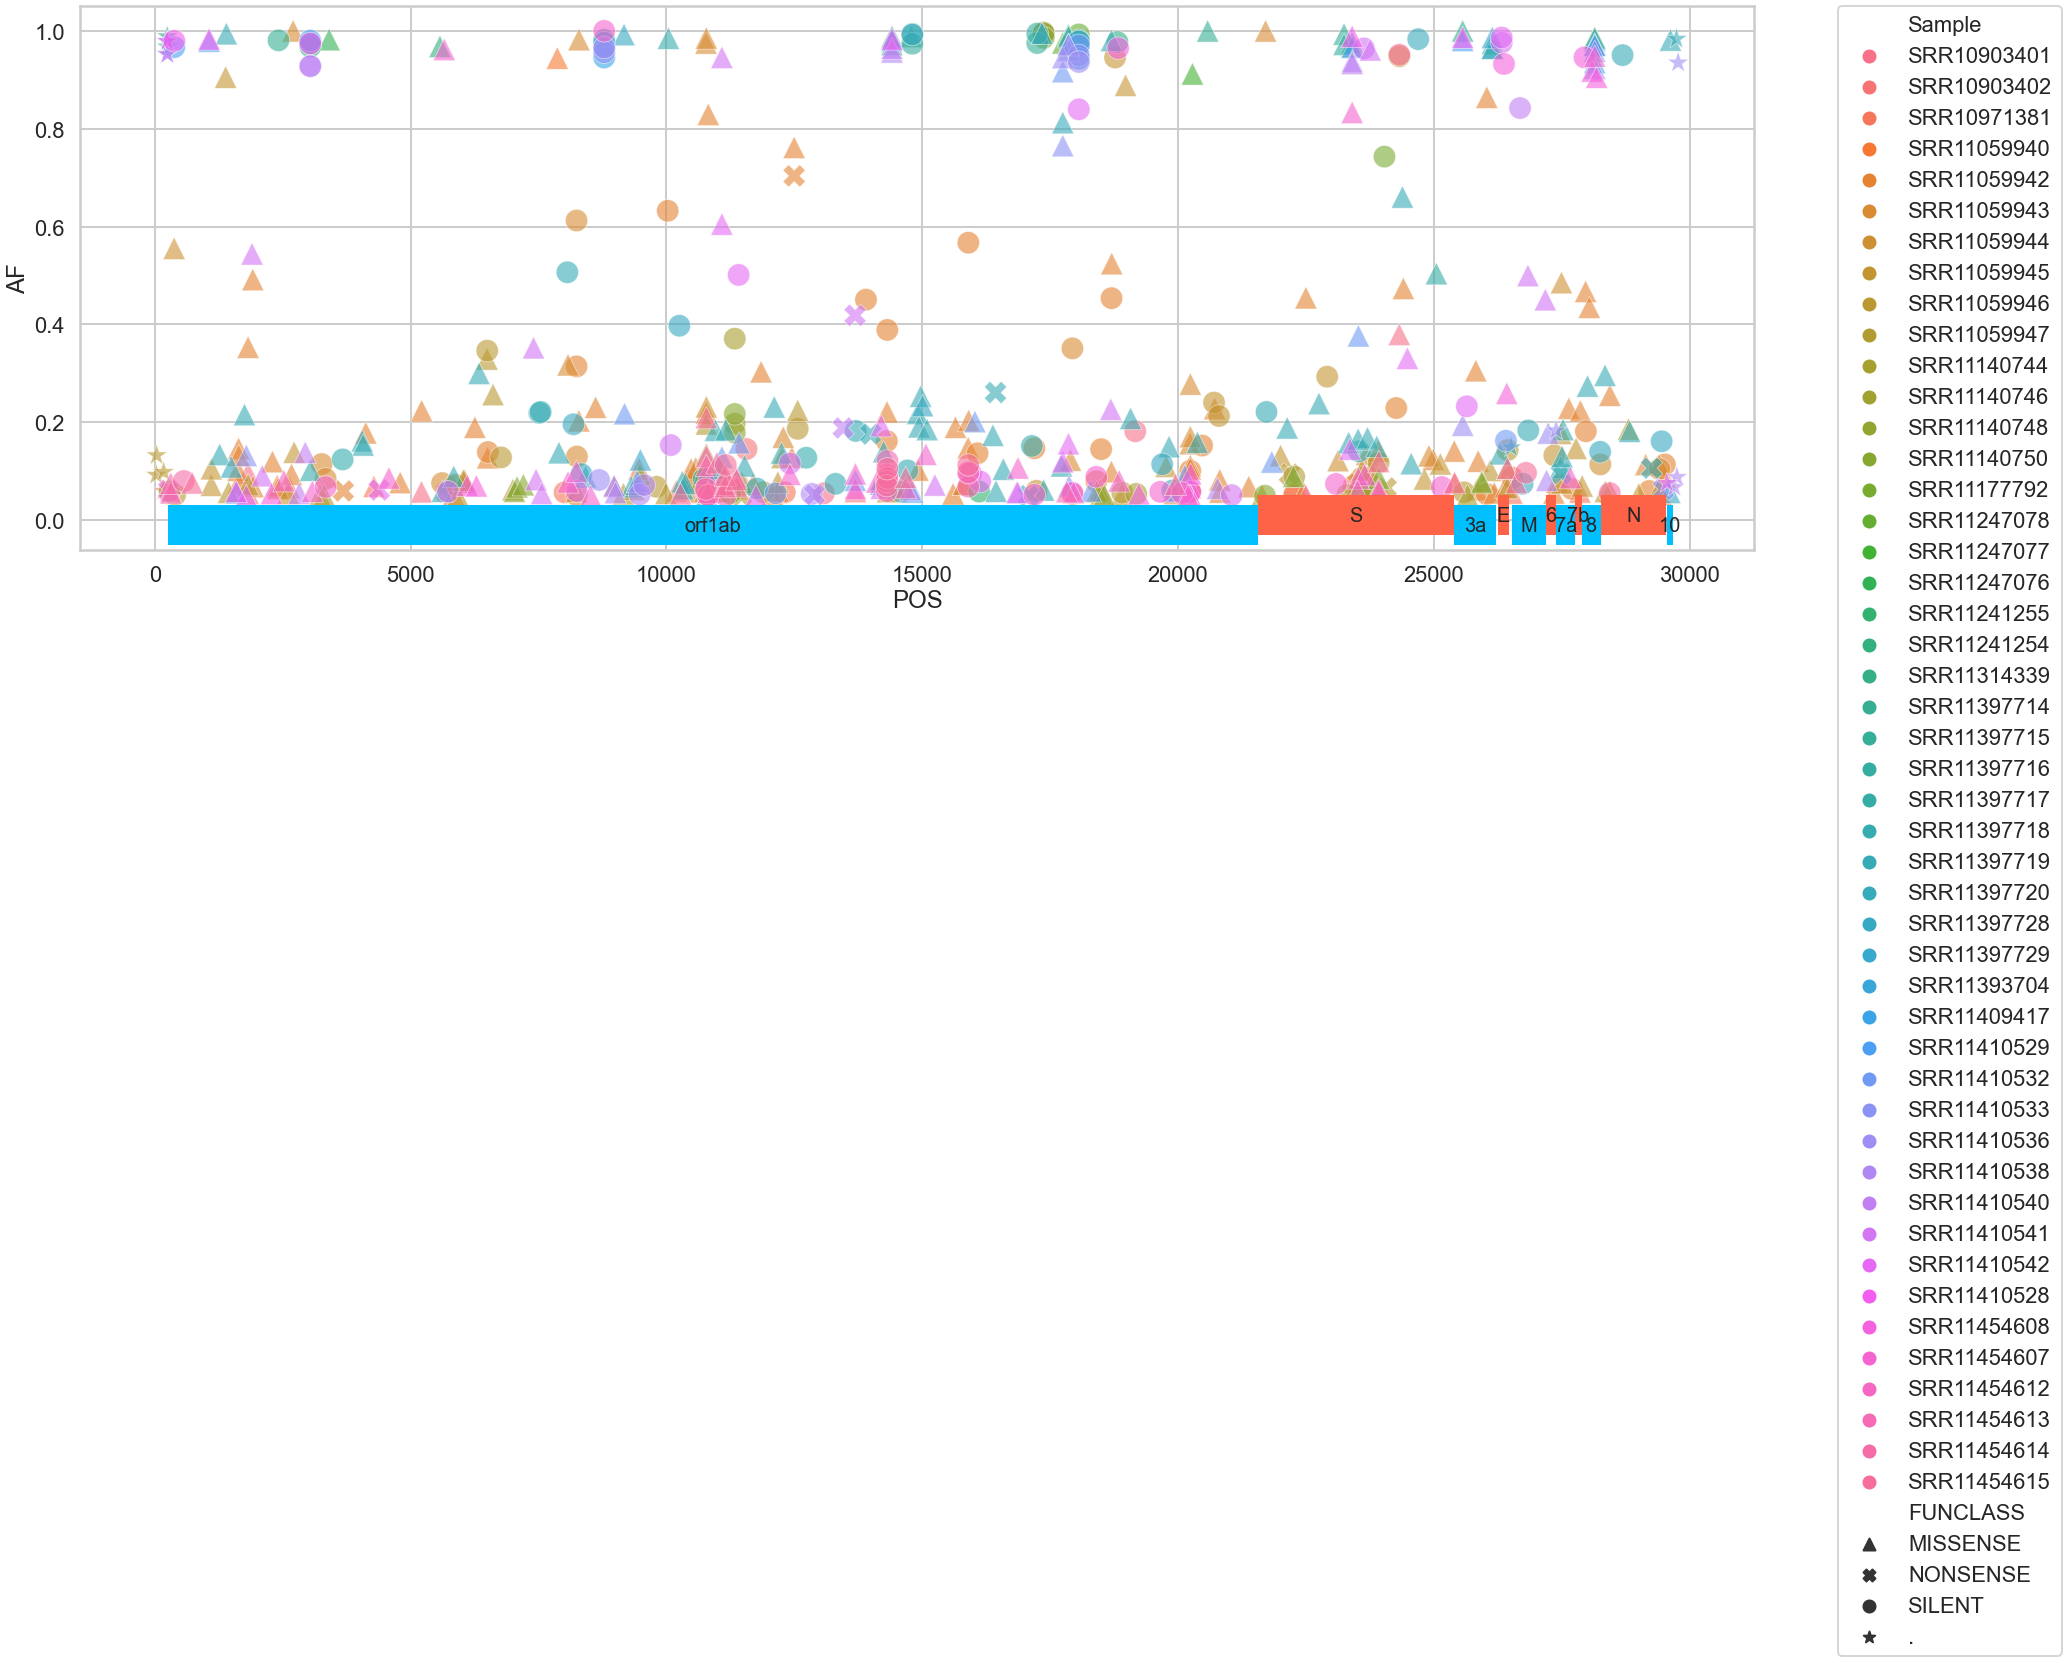

In [23]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set_context("poster")
sns.set_style("whitegrid")
plt.figure(figsize=(30,10))
markers = {".":"*", "MISSENSE":"^", "NONSENSE":"X", "SILENT":"o"}
sns.scatterplot(x='POS',y='AF',data=var[var['AF']>=0.05],hue='Sample',style='FUNCLASS',legend='brief',alpha=0.6,s=500,markers=markers)
i = 0
for feature in record.features:
    if feature.type == 'gene':
        i += 1
        gene_name = feature.qualifiers['gene'][0]
        if gene_name.startswith('ORF'):
            gene_name=gene_name[3:]
        if i % 2 == 0:
            color ='tomato'
            y = 0.01
        else:
            color ='deepskyblue'
            y = -0.01
        plt.hlines(y,feature.location._start.position, feature.location._end.position, linewidth=40,color=color)
        plt.text(feature.location._start.position+(feature.location._end.position-feature.location._start.position)//2, y, gene_name,horizontalalignment='center',verticalalignment='center',fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [24]:
# List variants by sample and by position, highlighting allele frequencies

var[var['AF']>0.05].sort_values(by=['AF','POS'],ascending=False).style.bar(subset=['AF'],color='#d65f5f')

,Sample,CHROM,POS,REF,ALT,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,type
66637,SRR11397714,NC_045512,25563,G,T,119,1.000000,0,"0,0,56,63",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,ORF3a,caG/caT,S
1411,SRR11059943,NC_045512,21710,T,C,70,1.000000,0,"0,0,12,58",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,S,Tca/Cca,S
66635,SRR11397714,NC_045512,20578,G,T,107,1.000000,0,"0,0,66,41",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,Gtg/Ttg,S
77317,SRR11454607,NC_045512,8782,C,T,59,1.000000,0,"0,0,27,32",LOW,SILENT,SYNONYMOUS_CODING,orf1ab,agC/agT,S
1308,SRR11059943,NC_045512,2702,T,G,59,1.000000,0,"0,0,27,32",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,Ttc/Gtc,S
36170,SRR11140744,NC_045512,17373,C,T,5249,0.996571,0,"3,2,2782,2462",LOW,SILENT,SYNONYMOUS_CODING,orf1ab,gcC/gcT,S
38626,SRR11140746,NC_045512,17373,C,T,5045,0.996432,0,"3,3,2428,2610",LOW,SILENT,SYNONYMOUS_CODING,orf1ab,gcC/gcT,S
66773,SRR11397728,NC_045512,17339,C,T,202,0.995049,0,"0,0,101,101",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,gCa/gTa,S
40884,SRR11140748,NC_045512,17373,C,T,6125,0.994776,4,"3,7,2948,3163",LOW,SILENT,SYNONYMOUS_CODING,orf1ab,gcC/gcT,S
66646,SRR11397716,NC_045512,17247,T,C,184,0.994565,0,"0,0,97,87",LOW,SILENT,SYNONYMOUS_CODING,orf1ab,cgT/cgC,S


In [25]:
var[var['AF']>0.05].sort_values(by=['AF','POS'],ascending=False).to_csv('variant_list.05.tsv',sep='\t',index=False)

In [26]:
!ls

NC_045512.2.genbank                 SRR11410528.vcf.gz
README.md                           SRR11410529.vcf.gz
SRR10903401.vcf.gz                  SRR11410532.vcf.gz
SRR10903402.vcf.gz                  SRR11410533.vcf.gz
SRR10971381.vcf.gz                  SRR11410536.vcf.gz
SRR11059940.vcf.gz                  SRR11410538.vcf.gz
SRR11059941.vcf.gz                  SRR11410540.vcf.gz
SRR11059942.vcf.gz                  SRR11410541.vcf.gz
SRR11059943.vcf.gz                  SRR11410542.vcf.gz
SRR11059944.vcf.gz                  SRR11454606.vcf.gz
SRR11059945.vcf.gz                  SRR11454607.vcf.gz
SRR11059946.vcf.gz                  SRR11454608.vcf.gz
SRR11059947.vcf.gz                  SRR11454609.vcf.gz
SRR11140744.vcf.gz                  SRR11454610.vcf.gz
SRR11140746.vcf.gz                  SRR11454611.vcf.gz
SRR11140748.vcf.gz                  SRR11454612.vcf.gz
SRR11140750.vcf.gz                  SRR11454613.vcf.gz
SRR11177792.vcf.gz                  SRR11454614.vcf.gz
SRR1124125

In [27]:
if IN_GALAXY:
    put('variant_list.05.tsv')